In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import shapiro, probplot

There provides two normalization methos: Z-Score / Minimax. The below results use Z-Score.

In [2]:
#Z score
def process_eye_tracking_data(tsv_path, csv_path):
    # Load the TSV file into a DataFrame
    data = pd.read_csv(tsv_path, sep='\t')

    # Extract relevant columns and convert timestamps to numeric format if necessary
    data['Recording timestamp'] = pd.to_numeric(data['Recording timestamp'], errors='coerce') / 1000
    data['Pupil diameter left'] = pd.to_numeric(data['Pupil diameter left'], errors='coerce')
    data['Pupil diameter right'] = pd.to_numeric(data['Pupil diameter right'], errors='coerce')

    # Calculate average pupil size
    data['pupil_avg'] = data[['Pupil diameter left', 'Pupil diameter right']].mean(axis=1)

    # Normalize the pupil sizes
    pupil_mean = data['pupil_avg'].mean()
    pupil_std = data['pupil_avg'].std()
    data['pupil_avg_normalized'] = (data['pupil_avg'] - pupil_mean) / pupil_std

    # Load the start and end times from a CSV file
    task_times = pd.read_csv(csv_path)

    def find_closest_timestamp(ts_array, target_ts):
        """Find the closest timestamp in the array to the target timestamp."""
        ts_array = np.array(ts_array)
        index = np.abs(ts_array - target_ts).argmin()
        return ts_array[index]

    def calculate_pupil_metrics(data, task_times):
        results = []

        for index, row in task_times.iterrows():
            start_time = find_closest_timestamp(data['Recording timestamp'], row['Period Start Time'])
            end_time = find_closest_timestamp(data['Recording timestamp'], row['Period End Time'])
            label = row['Label']

            # Extract data for the current task
            task_data = data[(data['Recording timestamp'] >= start_time) & (data['Recording timestamp'] <= end_time)]

            if not task_data.empty:
                mean_pupil_size = task_data['pupil_avg_normalized'].mean()
                std_pupil_size = task_data['pupil_avg_normalized'].std()

                results.append({
                    'Task': index + 1,
                    'Start Time': start_time,
                    'End Time': end_time,
                    'Label': label,
                    'Mean Pupil Size': mean_pupil_size,
                    'Pupil Size Variability': std_pupil_size
                })

        return pd.DataFrame(results)

    # Calculate pupil size metrics
    pupil_metrics = calculate_pupil_metrics(data, task_times)

    # Display the results
    print(pupil_metrics)

    return pupil_metrics

Run the below code if you want to use Minimax normalization.

In [4]:
#Minimax
def process_eye_tracking_data(tsv_path, csv_path):
    # Load the TSV file into a DataFrame
    data = pd.read_csv(tsv_path, sep='\t')

    # Extract relevant columns and convert timestamps to numeric format if necessary
    data['Recording timestamp'] = pd.to_numeric(data['Recording timestamp'], errors='coerce') / 1000
    data['Pupil diameter left'] = pd.to_numeric(data['Pupil diameter left'], errors='coerce')
    data['Pupil diameter right'] = pd.to_numeric(data['Pupil diameter right'], errors='coerce')

    # Calculate average pupil size
    data['pupil_avg'] = data[['Pupil diameter left', 'Pupil diameter right']].mean(axis=1)

    # Normalize the pupil sizes to range 0-1
    pupil_min = data['pupil_avg'].min()
    pupil_max = data['pupil_avg'].max()
    data['pupil_avg_normalized'] = (data['pupil_avg'] - pupil_min) / (pupil_max - pupil_min)

    # Load the start and end times from a CSV file
    task_times = pd.read_csv(csv_path)

    def find_closest_timestamp(ts_array, target_ts):
        """Find the closest timestamp in the array to the target timestamp."""
        ts_array = np.array(ts_array)
        index = np.abs(ts_array - target_ts).argmin()
        return ts_array[index]

    def calculate_pupil_metrics(data, task_times):
        results = []

        for index, row in task_times.iterrows():
            start_time = find_closest_timestamp(data['Recording timestamp'], row['Period Start Time'])
            end_time = find_closest_timestamp(data['Recording timestamp'], row['Period End Time'])
            label = row['Label']

            # Extract data for the current task
            task_data = data[(data['Recording timestamp'] >= start_time) & (data['Recording timestamp'] <= end_time)]

            if not task_data.empty:
                mean_pupil_size = task_data['pupil_avg_normalized'].mean()
                std_pupil_size = task_data['pupil_avg_normalized'].std()

                results.append({
                    'Task': index + 1,
                    'Start Time': start_time,
                    'End Time': end_time,
                    'Label': label,
                    'Mean Pupil Size': mean_pupil_size,
                    'Pupil Size Variability': std_pupil_size
                })

        return pd.DataFrame(results)

    # Calculate pupil size metrics
    pupil_metrics = calculate_pupil_metrics(data, task_times)

    # Display the results
    print(pupil_metrics)

    return pupil_metrics

In [3]:
# List of file pairs (TSV and corresponding CSV)
file_pairs = [
    (r"D:\data\eyetracking\New Data 记录名称 69.tsv", r"D:\data\eyetracking\miss10_69-20240426T0615.csv"),
    (r"D:\data\eyetracking\New Data 记录名称 70.tsv", r"D:\data\eyetracking\full16_70.csv"),
    (r"D:\data\eyetracking\New Data 记录名称 71.tsv", r"D:\data\eyetracking\miss13_71.csv"),
    (r"D:\data\eyetracking\New Data 记录名称 72.tsv", r"D:\data\eyetracking\miss10_72.csv"),
    (r"D:\data\eyetracking\New Data 记录名称 73 (1).tsv", r"D:\data\eyetracking\full16_73.csv"),
    (r"D:\data\eyetracking\New Data 记录名称 74.tsv", r"D:\data\eyetracking\miss07_74.csv"),
    (r"D:\data\eyetracking\New Data 记录名称 76.tsv", r"D:\data\eyetracking\full16_76.csv"),
    (r"D:\data\eyetracking\New Data 记录名称 79.tsv", r"D:\data\eyetracking\full16_79.csv"),
    (r"D:\data\eyetracking\New Data 记录名称 81.tsv", r"D:\data\eyetracking\full16_81_final.csv"),
    (r"D:\data\eyetracking\New Data 记录名称 83.tsv",r"D:\data\eyetracking\miss15_83_final.csv"),
    (r"D:\data\eyetracking\New Data 记录名称 85.tsv", r"D:\data\eyetracking\full16_85_final.csv"),
    (r"D:\data\eyetracking\New Data 记录名称 86.tsv", r"D:\data\eyetracking\full16_86_final.csv"),
    # Add more file pairs as needed
]


In [5]:
# Define colors for different task types
label_colors = {
    'LL': 'blue',
    'RR': 'red',
    'LR': 'green',
    'RL': 'orange'
}

# Initialize plot
plt.figure(figsize=(12, 6))

# Placeholder for collecting data
data = {'LL': [], 'RR': [], 'LR': [], 'RL': []}

# Process each pair of files and collect the results
for tsv_path, csv_path in file_pairs:
    pupil_metrics = process_eye_tracking_data(tsv_path, csv_path)
    
    for label in pupil_metrics['Label'].unique():
        label_data = pupil_metrics[pupil_metrics['Label'] == label]
        data[label].extend(label_data['Mean Pupil Size'].tolist())

# Create a DataFrame from the collected data
boxplot_data = pd.DataFrame({label: pd.Series(sizes) for label, sizes in data.items()})

   Task  Start Time    End Time Label  Mean Pupil Size  Pupil Size Variability
0     1   50854.991   52858.617    LL        -0.649996                0.488699
1     2   79306.467   80909.367    LL        -0.343401                0.797325
2     3   96537.642   98140.541    LL        -0.476397                0.724974
3     4  114570.267  116573.890    LL        -0.433779                0.700319
4     5  169068.866  171072.489    RR        -0.363752                0.394634
5     6  190708.017  192711.640    RR        -0.520130                0.812598
6     7  208740.641  210744.267    RR        -0.752114                0.737342
7     8  227975.442  229578.341    RR        -1.029256                0.672121
8     9  318539.292  320542.915    LR        -0.281588                0.641551
9    10  336972.642  338575.541    LR        -0.561487                0.691054
    Task  Start Time    End Time Label  Mean Pupil Size  \
0      1   78902.207   80905.832    LL        -0.491050   
1      2  118

<Figure size 1200x600 with 0 Axes>

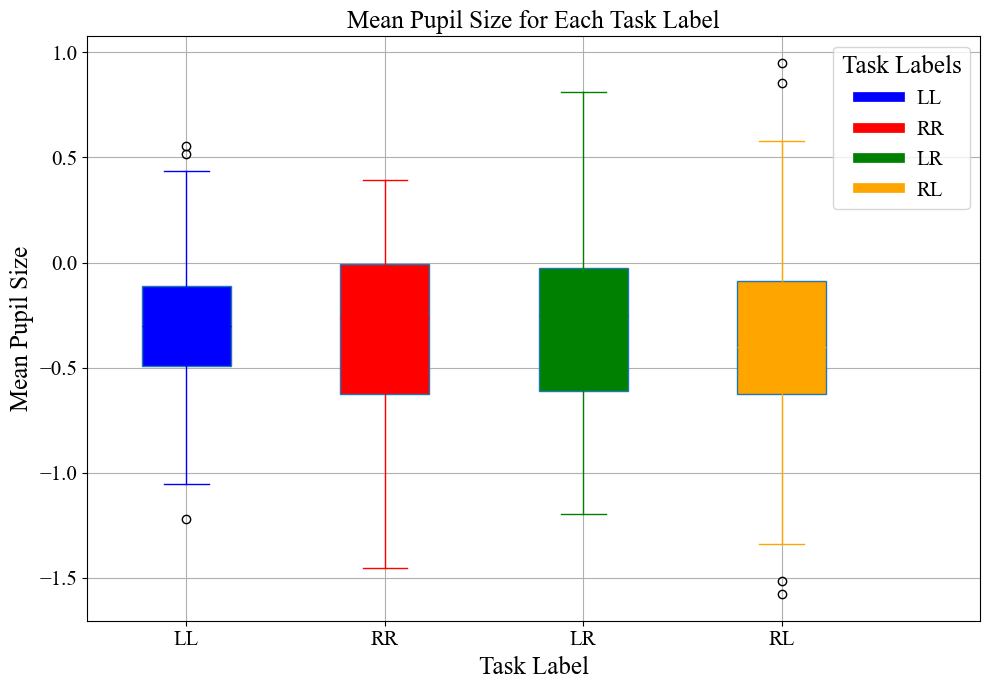

In [71]:
# Define colors for each label
label_colors = {'LL': 'blue', 'RR': 'red', 'LR': 'green', 'RL': 'orange'}

# Set the figure size larger (width=11 inches, height=8 inches)
plt.figure(figsize=(10, 7))

# Create the box plots
box = boxplot_data.boxplot(patch_artist=True, return_type='dict')

# Customize colors for each box plot
for label, color in label_colors.items():
    idx = list(label_colors.keys()).index(label)
    plt.setp(box['boxes'][idx], facecolor=color)
    plt.setp(box['whiskers'][2*idx:2*idx+2], color=color)
    plt.setp(box['caps'][2*idx:2*idx+2], color=color)
    plt.setp(box['medians'][idx], color=color)

# Add title and labels with Times New Roman font and size 10
plt.title('Mean Pupil Size for Each Task Label', fontsize=18, fontname='Times New Roman')
plt.xlabel('Task Label', fontsize=18, fontname='Times New Roman')
plt.ylabel('Mean Pupil Size', fontsize=18, fontname='Times New Roman')

# Set the tick font size and font family
plt.xticks(fontsize=15, fontname='Times New Roman')
plt.yticks(fontsize=15, fontname='Times New Roman')

# Create legend with Times New Roman font and size 20
handles = [plt.Line2D([0], [0], color=color, lw=7, label=label) for label, color in label_colors.items()]
plt.legend(handles=handles, title='Task Labels', loc=0, title_fontsize=18, prop={'family': 'Times New Roman','size': 15})

# Expand the x-axis limit to leave space on the right
plt.xlim(right=plt.xlim()[1] + 0.5)  # Add some space (e.g., 0.5) to the right limit

# Adjust layout to avoid clipping of text
plt.tight_layout()

# Show plot
plt.show()

In [18]:
def check_normality(pupil_metrics):
    tasks = ['LL', 'LR', 'RR', 'RL']
    results = {}

    plt.figure(figsize=(12, 10))
    
    for i, task in enumerate(tasks):
        subset = pupil_metrics[pupil_metrics['Label'] == task]['Mean Pupil Size']
        
        # Shapiro-Wilk test
        stat, p_value = shapiro(subset)
        results[task] = {'Shapiro-Wilk Test Statistic': stat, 'p-value': p_value}
        
        # Q-Q plot
        plt.subplot(2, 2, i + 1)
        probplot(subset, dist="norm", plot=plt)
        plt.title(f'Q-Q plot for {task}', fontsize=16)
        plt.xlabel('Theoretical Quantiles', fontsize=14)
        plt.ylabel('Sample Quantiles', fontsize=14)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
    
    plt.tight_layout()
    plt.show()
    
    return results

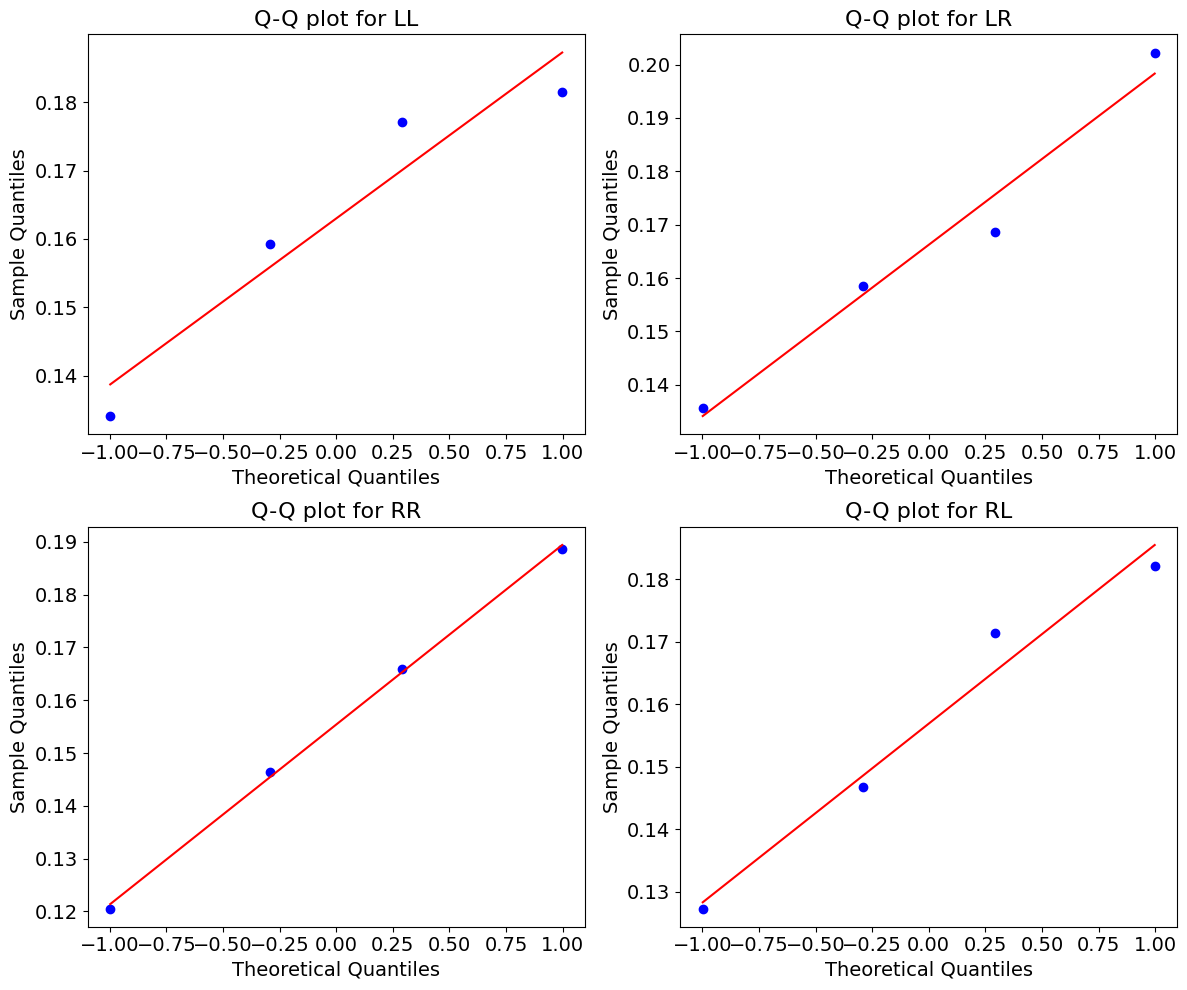

Normality Test Results:
LL: Shapiro-Wilk Test Statistic = 0.9088601663951982, p-value = 0.47638381363328863
LR: Shapiro-Wilk Test Statistic = 0.9800550705347673, p-value = 0.9023417665761172
RR: Shapiro-Wilk Test Statistic = 0.9975190984136112, p-value = 0.991855144158643
RL: Shapiro-Wilk Test Statistic = 0.9563954082751283, p-value = 0.7562265612973591


In [16]:
normality_results = check_normality(pupil_metrics)

print("Normality Test Results:")
for task, result in normality_results.items():
    print(f"{task}: Shapiro-Wilk Test Statistic = {result['Shapiro-Wilk Test Statistic']}, p-value = {result['p-value']}")

In [20]:
def compare_task_pairs(pupil_metrics):
    # Define pairs to compare
    pairs = [
        ('LL', 'LR'),
        ('LL', 'RL'),
        ('LL', 'RR'),
        ('LR', 'RL'),
        ('LR', 'RR'),
        ('RR', 'RL')
    ]
    results = {}
    
    for pair in pairs:
        group1 = pupil_metrics[pupil_metrics['Label'] == pair[0]]
        group2 = pupil_metrics[pupil_metrics['Label'] == pair[1]]

        # Perform t-test
        t_stat, p_value = ttest_ind(group1['Mean Pupil Size'], group2['Mean Pupil Size'])

        results[f'{pair[0]} vs {pair[1]}'] = {'t-statistic': t_stat, 'p-value': p_value}
        
        print(f"Comparison {pair[0]} vs {pair[1]}: t-statistic = {t_stat}, p-value = {p_value}")
        if p_value < 0.05:
            print(f"There is a statistically significant difference between {pair[0]} and {pair[1]}.")
        else:
            print(f"There is no statistically significant difference between {pair[0]} and {pair[1]}.")
    
    return results

In [21]:
results = compare_task_pairs(pupil_metrics)

Comparison LL vs LR: t-statistic = -0.18502268364905972, p-value = 0.8593070520949414
There is no statistically significant difference between LL and LR.
Comparison LL vs RL: t-statistic = 0.3719061160368818, p-value = 0.7227437397204541
There is no statistically significant difference between LL and RL.
Comparison LL vs RR: t-statistic = 0.4211121127983421, p-value = 0.6883413609165117
There is no statistically significant difference between LL and RR.
Comparison LR vs RL: t-statistic = 0.5033997196093134, p-value = 0.6326262597920052
There is no statistically significant difference between LR and RL.
Comparison LR vs RR: t-statistic = 0.5412745523617841, p-value = 0.607814113551989
There is no statistically significant difference between LR and RR.
Comparison RR vs RL: t-statistic = -0.07939602699194824, p-value = 0.9392994647951274
There is no statistically significant difference between RR and RL.


In [22]:
def calculate_effect_size(group1, group2):
    """Calculate Cohen's d for two groups."""
    n1, n2 = len(group1), len(group2)
    mean1, mean2 = np.mean(group1), np.mean(group2)
    std1, std2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
    
    pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
    cohen_d = (mean1 - mean2) / pooled_std
    
    return cohen_d

def compare_groups_directly(pupil_metrics):
    # Group tasks
    rl_lr_group = pupil_metrics[pupil_metrics['Label'].isin(['RL', 'LR'])]['Mean Pupil Size']
    rr_ll_group = pupil_metrics[pupil_metrics['Label'].isin(['RR', 'LL'])]['Mean Pupil Size']

    # Calculate means and standard deviations
    rl_lr_mean = rl_lr_group.mean()
    rl_lr_std = rl_lr_group.std()
    rr_ll_mean = rr_ll_group.mean()
    rr_ll_std = rr_ll_group.std()

    # Calculate effect size
    effect_size = calculate_effect_size(rl_lr_group, rr_ll_group)

    print(f"RL/LR Mean Pupil Size: {rl_lr_mean}, Standard Deviation: {rl_lr_std}")
    print(f"RR/LL Mean Pupil Size: {rr_ll_mean}, Standard Deviation: {rr_ll_std}")
    print(f"Cohen's d (Effect Size): {effect_size}")
    return rl_lr_mean, rl_lr_std, rr_ll_mean, rr_ll_std, effect_size

In [23]:
rl_lr_mean, rl_lr_std, rr_ll_mean, rr_ll_std, effect_size = compare_groups_directly(pupil_metrics)

RL/LR Mean Pupil Size: -0.7462748207298779, Standard Deviation: 0.4278454481668481
RR/LL Mean Pupil Size: -0.7873225146769235, Standard Deviation: 0.4137519671815404
Cohen's d (Effect Size): 0.09753342598919283
